In [2]:
from spectral import *
import numpy as np
import matplotlib.pyplot as plt
import skimage

from matplotlib.pyplot import interactive

hyperim = np.load("nmbu.npy")
wavelength = envi.read_envi_header('nmbu.hdr')['wavelength']
ww = [float(i) for i in wavelength]

In [3]:
def get_band(wavelength, wave_val):
    diffs = [(i, abs(float(w) - wave_val)) for i, w in enumerate(wavelength)]
    closest = sorted(diffs, key=lambda t: t[1])[0]
    return closest[0]

get_band(wavelength, 440)

bands = {
    'blue': get_band(wavelength, 440),
    'green': get_band(wavelength, 535),
    'red': get_band(wavelength, 645),
    'NIR': get_band(wavelength, 800),
}
bands

{'blue': 11, 'green': 41, 'red': 75, 'NIR': 124}

ImageView object:
  Display bands       :  (75, 46, 21)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.003924822900444269, 0.08348371833562851]
    G: [0.007099232170730829, 0.09052649140357971]
    B: [0.007762207183986902, 0.08094877749681473]

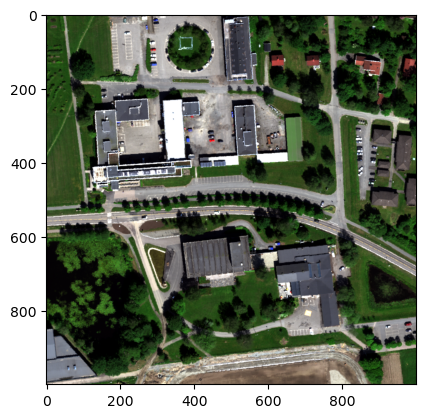

In [4]:
imshow(hyperim, (75, 46, 21), stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)))

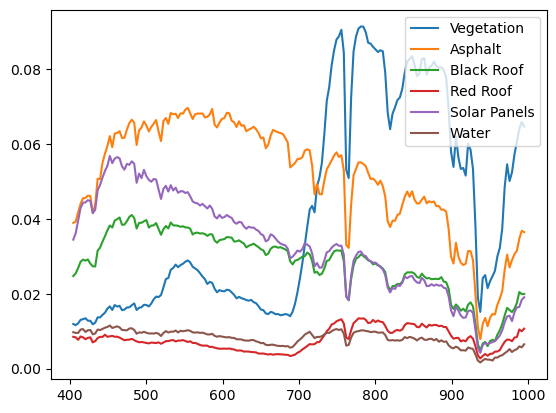

In [5]:
# grass = np.array(hyperim[x, y], :).reshape(-1, 1)
grass = np.array(hyperim[84, 140, :]).reshape(-1, 1)
asphalt = np.array(hyperim[68, 248, :]).reshape(-1, 1)
black_roof = np.array(hyperim[653, 670, :]).reshape(-1, 1)
red_roof = np.array(hyperim[147, 621, :]).reshape(-1, 1)
solar_panels = np.array(hyperim[406, 475, :]).reshape(-1, 1)
water = np.array(hyperim[718, 908, :]).reshape(-1, 1)


plt.plot(ww, grass, label="Vegetation")
plt.plot(ww, asphalt, label="Asphalt")
plt.plot(ww, black_roof, label="Black Roof")
plt.plot(ww, red_roof, label="Red Roof")
plt.plot(ww, solar_panels, label="Solar Panels")
plt.plot(ww, water, label="Water")

plt.legend()

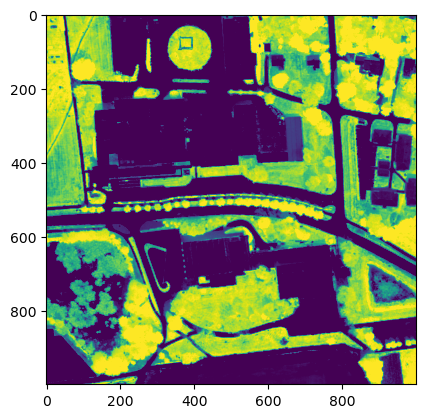

In [6]:
def NDVI(NIR, red):
    return np.divide((NIR-red), (NIR+red))

ndvi = NDVI(hyperim[:,:,bands['NIR']], hyperim[:,:,bands['red']])
plt.imshow(ndvi, vmin=0, vmax=0.8)

In [7]:
# Transform the image data using the PCA model
pca = principal_components(hyperim)

To compute PCA using the principal_components() function from the spectral Python package, you can use the following steps:

Import the principal_components() function from the spectral.algorithms module.
Load the hyperspectral image data using the load_image() function from the spectral package.
Use the principal_components() function to compute the principal components of the image data.
Use the explained_variance_ attribute of the result to access the explained variance for each principal component.
Use the transformed_data attribute of the result to access the transformed data, which contains the scores for each principal component.
Here's an example of how you might use these steps to compute PCA using the principal_components() function and display the five first scores:

In this code, the load_image() function is used to load the hyperspectral image data from the .hdr file. The algorithms.principal_components() function is then used to compute the principal components of the image data. The explained variance for each principal component is printed using the explained_variance_ attribute of the result. Finally, a loop is used to print the first five scores for each principal component, using the transformed_data attribute of the result.

Note that the principal_components() function computes the principal components using singular value decomposition (SVD), which is a common method for computing PCA on large datasets. This method is efficient and numerically stable, but it may not always produce the same results as other methods for computing PCA. If you need to use a different method for computing PCA, you may need to use a different approach.

In [8]:
print(pca.eigenvalues.size)

186


In [9]:
pc_099 = pca.reduce(fraction=0.99)
pc_099.eigenvalues.size

5

Text(0.5, 1.0, 'Component 1 - Non vegetation')

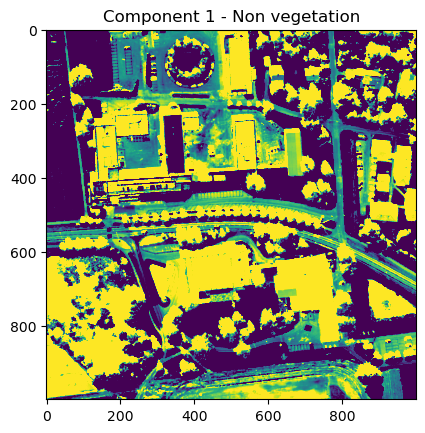

In [10]:
img_pc = pc_099.transform(hyperim) 

plt.imshow(img_pc[:, :, 0], vmin=-0.1, vmax=0.15) 
plt.title('Component 1 - Non vegetation') 

Text(0.5, 1.0, 'Component 2 - Vegetation')

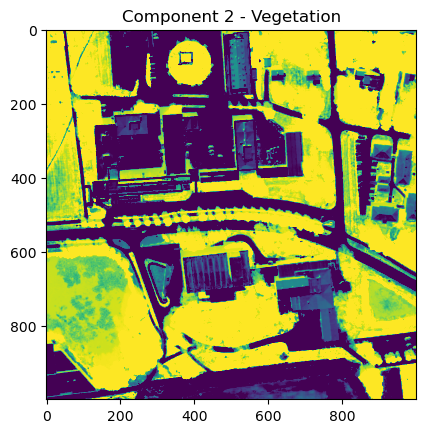

In [11]:
plt.imshow(img_pc[:, :, 1], vmin=-0.1, vmax=0.15) 
plt.title('Component 2 - Vegetation') 

Text(0.5, 1.0, 'Component 3 - Types of vegetation')

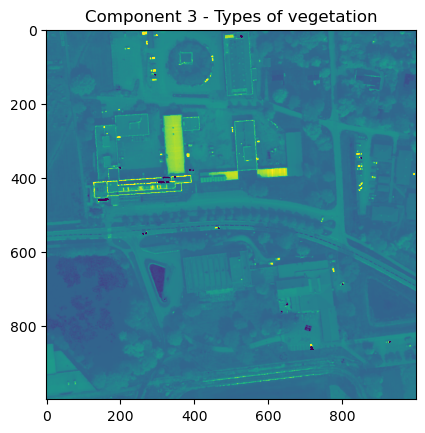

In [12]:
plt.imshow(img_pc[:, :, 2], vmin=-0.1, vmax=0.15) 
plt.title('Component 3 - Types of vegetation') 

Text(0.5, 1.0, 'Component 4 - Types of vegetation')

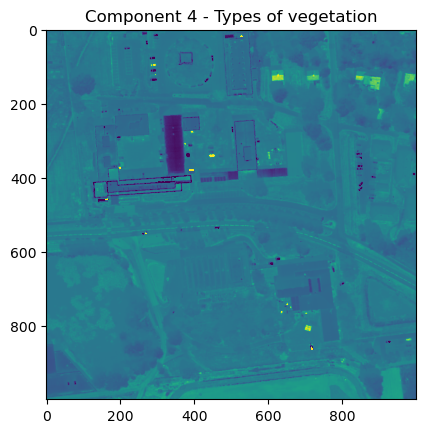

In [13]:
plt.imshow(img_pc[:, :, 3], vmin=-0.1, vmax=0.15) 
plt.title('Component 4 - Types of vegetation') 

Text(0.5, 1.0, 'Component 5 - Types of vegetation')

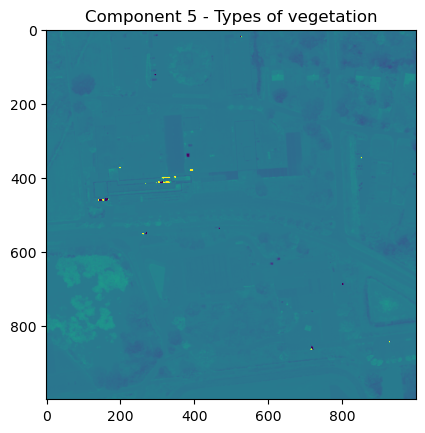

In [14]:
plt.imshow(img_pc[:, :, 4], vmin=-0.1, vmax=0.15) 
plt.title('Component 5 - Types of vegetation') 

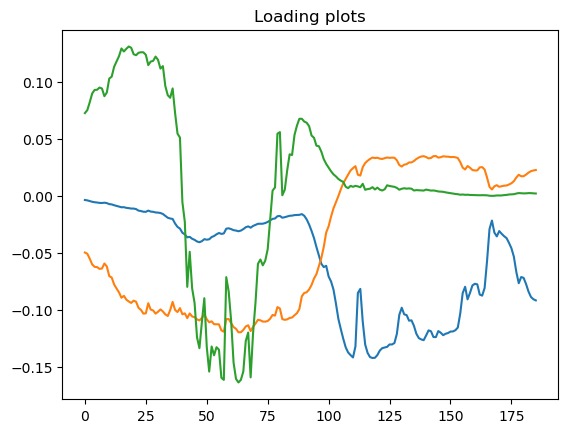

In [15]:
loadings = pc_099.eigenvectors 
plt.figure() 
plt.title("Loading plots") 
plt.plot(loadings[:, [0]], label='Component 1') 
plt.plot(loadings[:, [1]], label='Component 2') 
plt.plot(loadings[:, [2]], label='Component 3') 

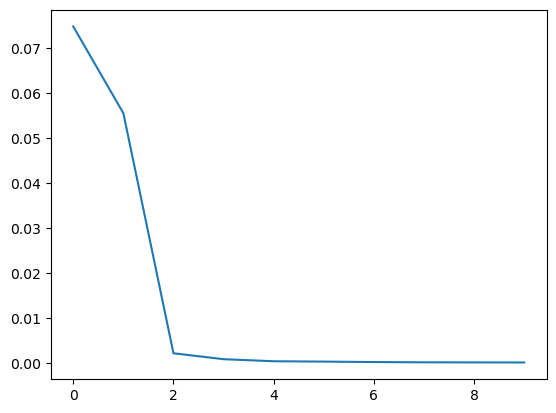

In [16]:
plt.figure() 
plt.plot(pca.eigenvalues[:10])

From the previously first 5 displayed scores we clearly saw that the first and the second score had the highest scores. In the first component the non vegetatation had the highest scores then in the second score the vegetation had the highest score. The third plot and the rest that followed afterwards carried alot of noise. which made it hard to distinguish between types in the image such as vegetation and non vegetation. 

In [17]:
sum_eig = sum(pca.eigenvalues)

explained_variance0 = pca.eigenvalues[0]/sum_eig
explained_variance0

0.5550394480865009

In [18]:
explained_variance1 = pca.eigenvalues[1]/sum_eig
explained_variance1

0.41189105069021514

In [19]:
explained_variance0 + explained_variance1

0.966930498776716

In [20]:
num_comp = 0
explained_99 = 0

for val in pca.eigenvalues:
    explained_99 += val/sum_eig
    num_comp += 1
    if explained_99 >= 0.999:
        break
        
explained_99
num_comp

print(f'The number of components needed in order to get a explained variance of {explained_99*100:.2f} is {num_comp}')

The number of components needed in order to get a explained variance of 99.90 is 31


In [21]:
shape = hyperim.shape
groundtruth = np.zeros([shape[0], shape[1]])

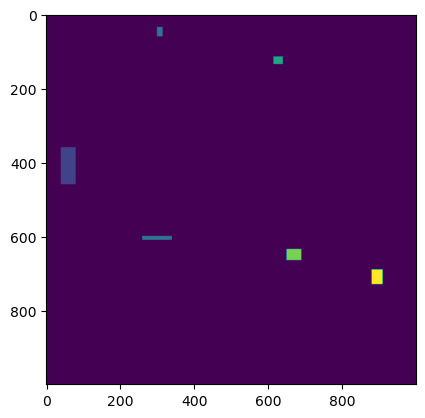

In [22]:
groundtruth[360:460, 40:80] = 1. # grass
groundtruth[35:60, 300:315] = 2. # asphalt
groundtruth[600:610, 260:340] = 2. # asphalt2
groundtruth[115:135, 615:640] = 3. # red roof
groundtruth[635:665, 650:690] = 4. # Black roof
groundtruth[690:730, 880:910] = 5. # water

plt.imshow(groundtruth)

spectral:INFO: Setting min samples to 186


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


ImageView object:
  Interpolation       :  <default>

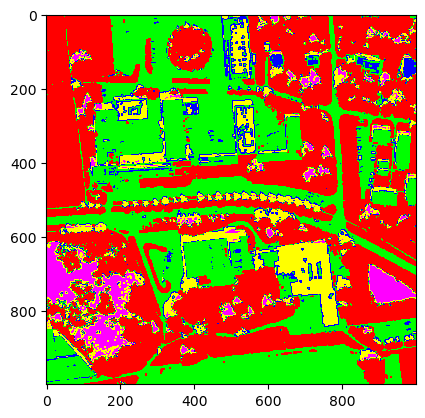

In [23]:
classes = create_training_classes(hyperim, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(hyperim)
imshow(classes=clmap)

In [24]:
pca = principal_components(hyperim)

In [25]:
scores = pca.transform(hyperim)

In [36]:
score = img_pc[:,:,:8]
shape = score.shape

groundtruth = np.zeros([shape[0], shape[1]])
groundtruth[360:460, 40:80] = 1. # grass
groundtruth[35:60, 300:315] = 2. # asphalt
groundtruth[600:610, 260:340] = 2. # asphalt2
groundtruth[115:135, 615:640] = 3. # red roof
groundtruth[635:665, 650:690] = 4. # Black roof
groundtruth[690:730, 880:910] = 5. # water

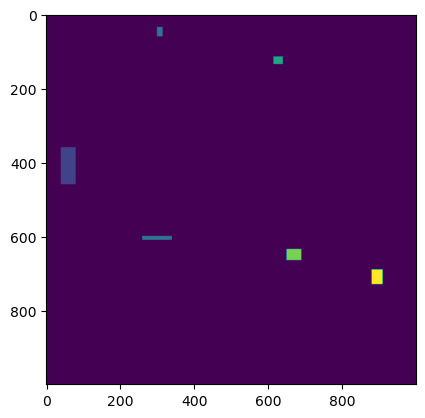

In [37]:
plt.imshow(groundtruth)

spectral:INFO: Setting min samples to 5


Processing...  0.0Processing... 20.0Processing... 40.0Processing... 60.0Processing... 80.0Processing... 100.Processing...done   


ImageView object:
  Interpolation       :  <default>

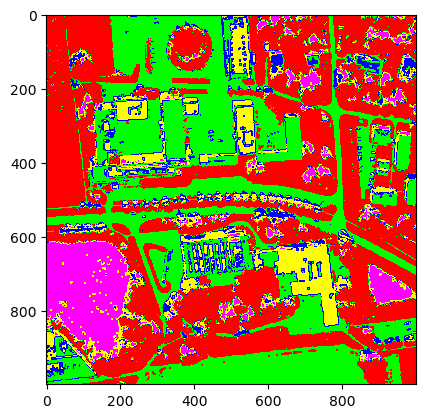

In [38]:
classes = create_training_classes(score, groundtruth)
gmlc = GaussianClassifier(classes)
clmap = gmlc.classify_image(score)
imshow(classes=clmap)

In [24]:
from skimage.filters import sobel

In [25]:
veg_class = classes[1]

ImageView object:
  Display bands       :  [0, 93.0, 185]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.006557989865541458, 0.3866649866104126]
    G: [0.002533748745918274, 2.0]
    B: [0.0009940983727574348, 0.7929046154022217]

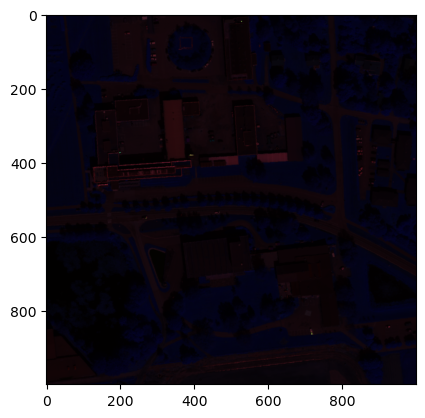

In [26]:
imshow(veg_class.image)

ImageView object:
  Display bands       :  [0, 93.0, 185]
  Interpolation       :  <default>
  RGB data limits     :
    R: [5.440931090561207e-06, 0.17515654861927032]
    G: [2.2880587948748143e-06, 1.0219370126724243]
    B: [5.600365057034651e-06, 0.3341318368911743]

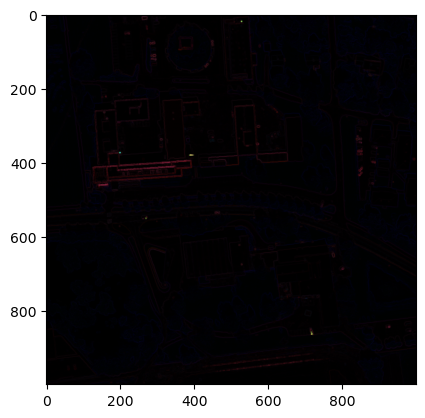

In [34]:
veg_edges = sobel(veg_class.image)
veg_edges = veg_edges.astype(np.float32)
imshow(veg_edges)

ImportError: cannot import name 'Image' from 'spectral' (/home/idux/miniconda3/envs/inf200/lib/python3.8/site-packages/spectral/__init__.py)